## Who can answer my question ?

User Recommendation is a project training a recommender system to recommend bests users susceptible to answer a stack overflow question.  
Here we will see how to visualize report generating by Metaflow at the end of the training.

### Import Metaflow Client

In [1]:
from metaflow import Flow, get_metadata
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/home/okteto/user_recommendation


### Get your latest run and print it

In [2]:
run = Flow('TrainingModelFlow').latest_successful_run
print("Using run: %s" % str(run))

Using run: Run('TrainingModelFlow/1658339754703510')


### Unpack models artifacts

In [3]:
model_cf, metrics_cf = run.data.model_artifacts_cf
model_hybrid, metrics_hybrid = run.data.model_artifacts_hybrid

### Print metrics monitored at training stage

In [4]:
metrics_cf

,epoch,stage,metric,value
0,0,train,ROC AUC,0.899850
1,0,validation,ROC AUC,0.669408
2,1,train,ROC AUC,0.899544
3,1,validation,ROC AUC,0.667524
4,2,train,ROC AUC,0.899299
5,2,validation,ROC AUC,0.669005
6,3,train,ROC AUC,0.900899
7,3,validation,ROC AUC,0.668433
8,4,train,ROC AUC,0.903541
9,4,validation,ROC AUC,0.667934


In [5]:
metrics_hybrid

,epoch,stage,metric,value
0,0,train,ROC AUC,0.836560
1,0,validation,ROC AUC,0.826494
2,1,train,ROC AUC,0.846302
3,1,validation,ROC AUC,0.834014
4,2,train,ROC AUC,0.851806
5,2,validation,ROC AUC,0.837299
6,3,train,ROC AUC,0.856272
7,3,validation,ROC AUC,0.839340
8,4,train,ROC AUC,0.859854
9,4,validation,ROC AUC,0.840547


## Monitoring of training

### Monitoring of pure Collaborative Filtering model

As we can see, there is huge difference between the perfomance of the model in the train and validation set, also the model don't learn across epochs.  
This means that it has difficulties to generalize and is overfitted.

In [7]:
from user_recommendation.training.train import LigthFMTrainer

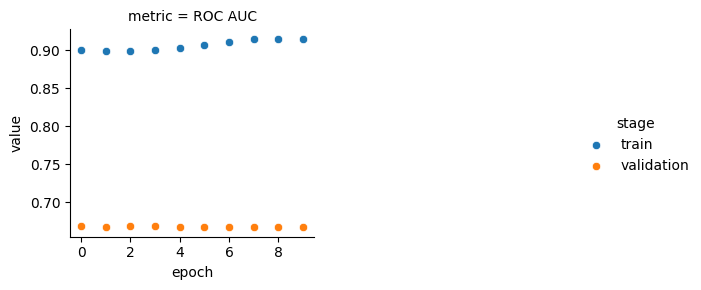

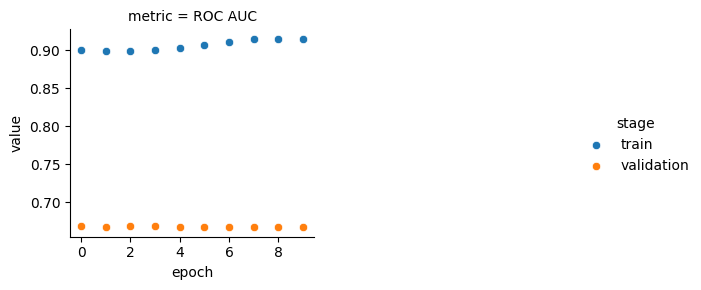

In [9]:
LigthFMTrainer.model_perf_plots(metrics_cf)

### Monitoring of pure Hybrid model

As we can see, the model is learning well until 5th-6th epoch, after that training performance continue to improve whereas validation performance stay constant could mean that the model is overfitting but the error between training and validation set remain low. This is due to high sparsity of our data and a lot of cold start case.

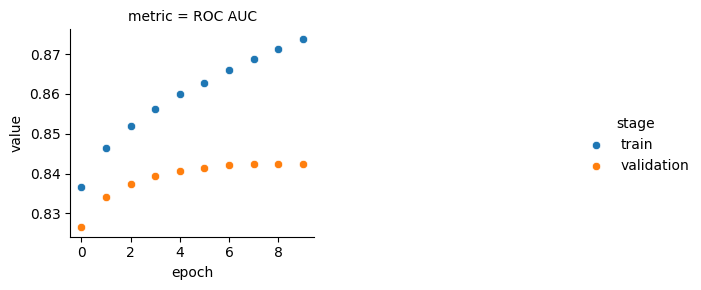

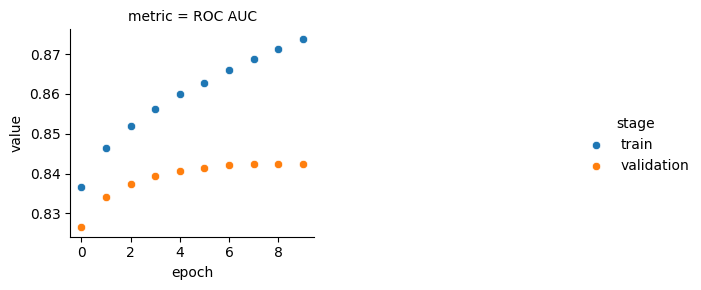

In [10]:
LigthFMTrainer.model_perf_plots(metrics_hybrid)

### Print the card of this run

In [55]:
from metaflow.cards import get_cards

# !!! Doesn't work, please run this command on your terminal to see the card 
# python user_recommendation/training_flow.py card view end
get_cards(run.end_task)


CardNotPresentException: Card not found for pathspec TrainingModelFlow/1658238716880761/end/15